In [97]:
import os, glob
import numpy as np
import pandas as pd
os.chdir("D:/takehome_challenge/Employee_Retention")

In [2]:
retention = pd.read_csv('employee_retention_data.csv')

In [3]:
retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
retention.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [5]:
retention['seniority'].sort_values(ascending = False)

24701    99
24700    98
13405    29
13203    29
13220    29
         ..
17240     1
17250     1
8507      1
8477      1
7746      1
Name: seniority, Length: 24702, dtype: int64

In [6]:
retention = retention[retention['seniority'] < 97]

### Create table with 3 columns: Day, employee_headcount, company_id

In [7]:
date = pd.date_range(start = '2011-01-24',end = '2015-12-13', freq = 'D')
date = pd.DataFrame(date)

In [8]:
company_id = pd.DataFrame(retention['company_id'])

In [9]:
date['A'] = 1
company_id['A'] = 1

all_date_company = pd.merge(date, company_id , left_on = 'A', right_on = 'A')

In [10]:
all_date_company = all_date_company.drop(['A'], axis = 1)

In [11]:
join_count = retention.groupby(['company_id','join_date'])['join_date'].count()

In [12]:
quit_count=retention.groupby(['company_id','quit_date'])['quit_date'].count()

In [13]:
join_count = pd.DataFrame(join_count)

In [14]:
join_count = join_count.rename({'join_date':'join_count'}, axis = 'columns').reset_index()

In [15]:
quit_count = pd.DataFrame(quit_count)
quit_count = quit_count.rename({'quit_date': 'quit_count'}, axis = 'columns').reset_index()

In [16]:
all_date_company.columns = ['date','company_id']
join_count['join_date'] = pd.to_datetime(join_count['join_date'])

In [17]:
join = all_date_company.merge(join_count, right_on = ['company_id','join_date'], left_on = ['company_id','date'], how = 'left')

In [18]:
quit_count['quit_date'] = pd.to_datetime(quit_count['quit_date'])
quit = all_date_company.merge(quit_count, right_on = ['company_id','quit_date'], left_on = ['company_id','date'], how = 'left')

In [21]:
join['join_count'] = join['join_count'].fillna(0)

In [22]:
quit['quit_count'] = quit['quit_count'].fillna(0)

In [40]:
join = join.groupby(['company_id','date']).sum().groupby(level = 0).cumsum().reset_index()

In [41]:
quit = quit.groupby(['company_id','date']).sum().groupby(level = 0).cumsum().reset_index()

In [43]:
all_date_company['head_count'] = join['join_count'] - quit['quit_count']

In [46]:
all_date_company.fillna(0)

,date,company_id,head_count
0,2011-01-24,7,212125.0
1,2011-01-24,7,229095.0
2,2011-01-24,4,246065.0
3,2011-01-24,7,246065.0
4,2011-01-24,2,246065.0
...,...,...,...
44089495,2015-12-13,1,0.0
44089496,2015-12-13,6,0.0
44089497,2015-12-13,3,0.0
44089498,2015-12-13,4,0.0


## retention reasons : feature extraction

In general, whenever you have a date, extract week of the year, and day of the we
ek. They tend to give an idea of seasonlity and weekly trends.

In [85]:
retention['quit_date'] = pd.to_datetime(retention['quit_date'])
retention['week'] = retention['quit_date'].dt.week

In [87]:
quit_week = retention.groupby(['week'])['week'].count()

In [88]:
df_quit= pd.DataFrame(quit_date)

In [89]:
df_quit.columns = ['count']

In [90]:
df_quit.reset_index()

,week,count
0,1.0,238
1,2.0,242
2,3.0,276
3,4.0,255
4,5.0,259
5,6.0,251
6,7.0,214
7,8.0,231
8,9.0,265
9,10.0,274


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

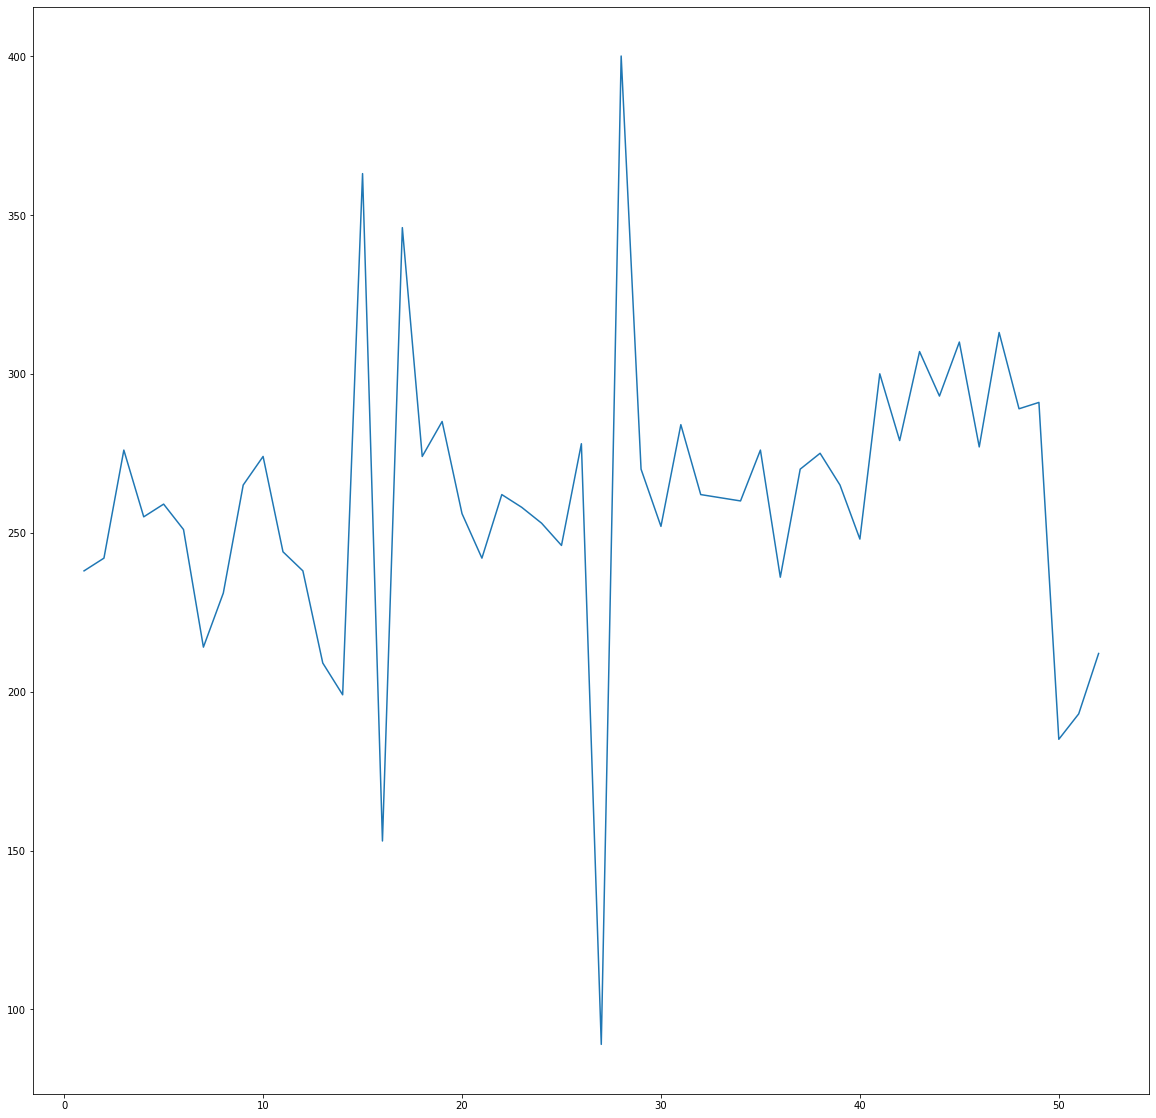

In [91]:
plt.figure(figsize=(20,20))
plt.plot(df_quit)

There is a little peak in the middle of the year. Before that peak there is a bottom. People may like quit in the middle of the year.

In [75]:
retention.groupby('company_id')['quit_date'].value_counts()

company_id  quit_date 
1           2015-05-08    38
            2015-05-29    37
            2015-10-09    37
            2014-12-05    36
            2015-02-27    36
                          ..
12          2013-07-12     1
            2013-10-18     1
            2013-10-25     1
            2014-02-07     1
            2014-09-19     1
Name: quit_date, Length: 2724, dtype: int64

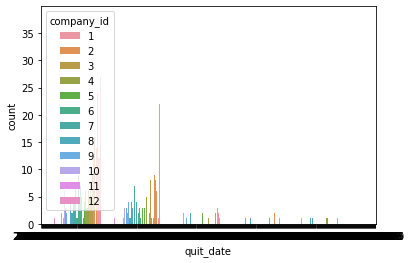

In [77]:
sns.countplot('quit_date',data = retention, hue = 'company_id')

Company 1 has highest retention number. 

In [98]:
retention['join_date'] = pd.to_datetime(retention['join_date'])
retention['employment_days'] = (retention['quit_date'] - retention['join_date'])/np.timedelta64(1, 'D')

In [100]:
retention.fillna(0)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,week,employment_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30 00:00:00,44.0,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04 00:00:00,14.0,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,0,0.0,0.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07 00:00:00,23.0,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22 00:00:00,34.0,1040.0
...,...,...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26 00:00:00,26.0,1151.0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01 00:00:00,5.0,372.0
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,0,0.0,0.0
24698,590087.0,4,engineer,10,160000.0,2015-10-26,0,0.0,0.0


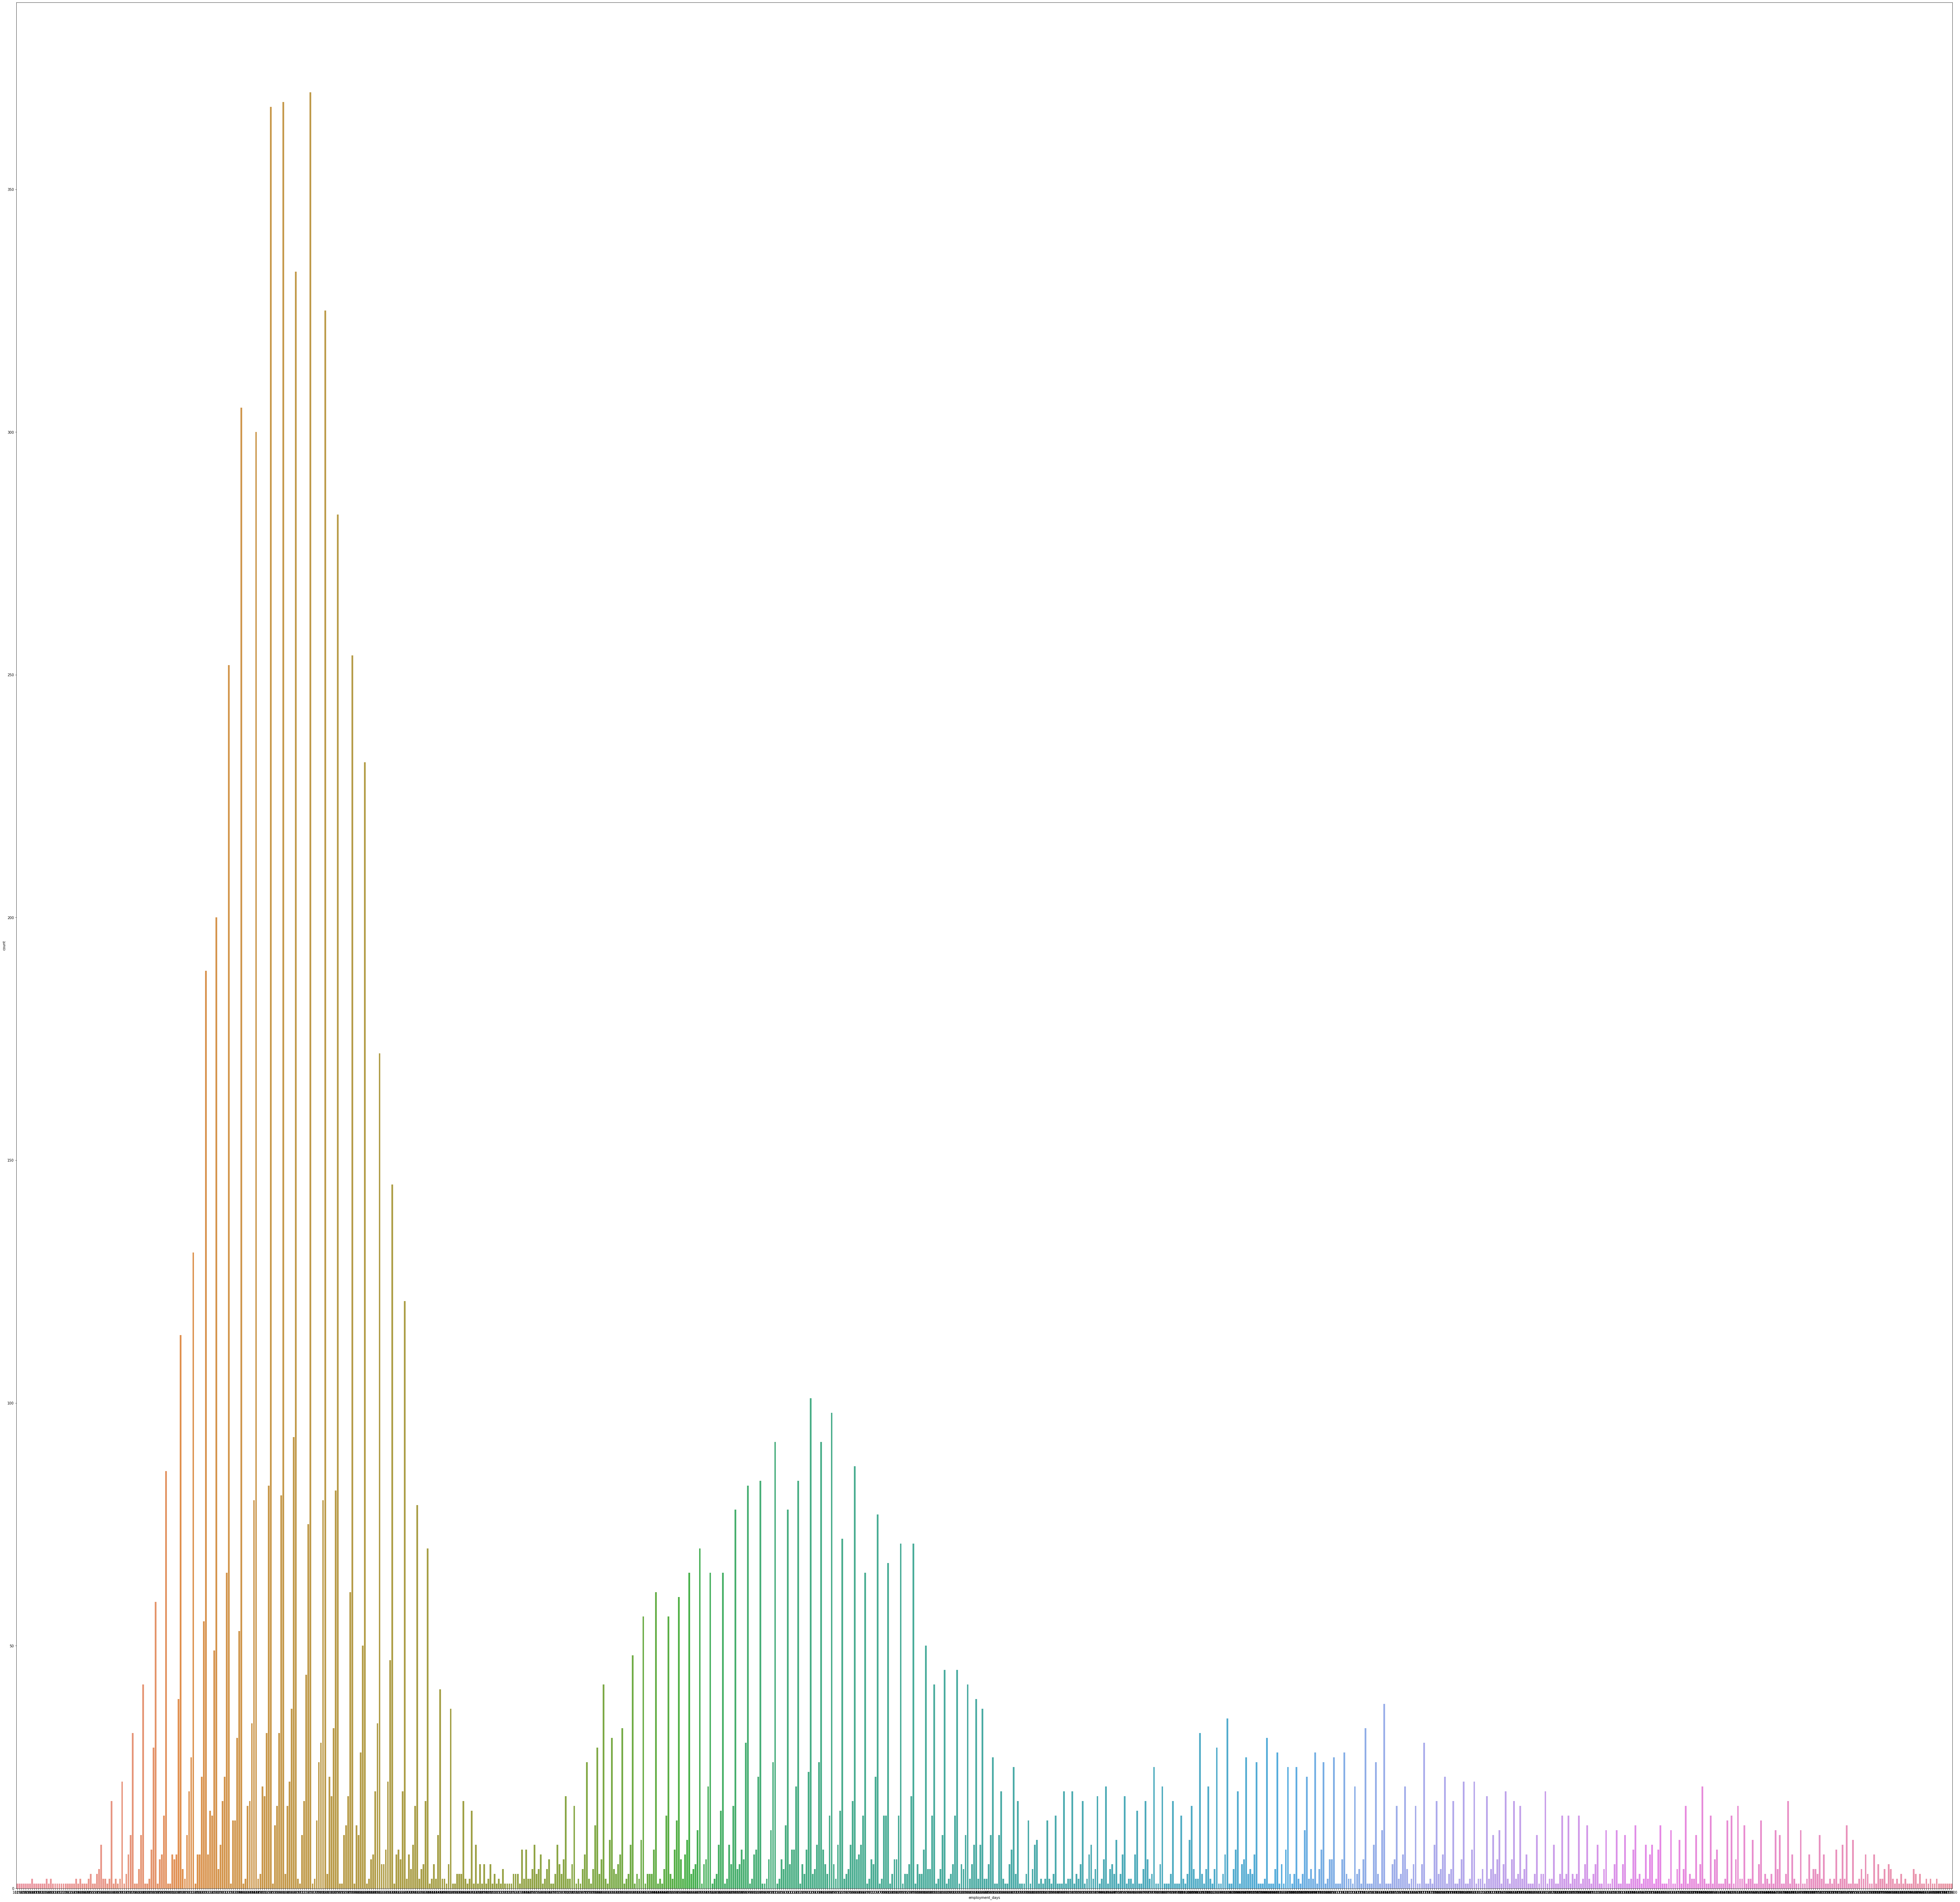

In [109]:
plt.subplots(figsize=(100,100))
sns.countplot('employment_days',data = retention)

In [113]:
retention['employment_days'].sort_values()[150:200]

7324     277.0
20989    277.0
20556    277.0
17721    277.0
4122     277.0
4076     277.0
20863    277.0
2928     277.0
14197    277.0
5507     277.0
15832    277.0
22982    277.0
5782     277.0
19667    277.0
20216    277.0
18499    277.0
19504    277.0
1013     277.0
8123     277.0
22083    279.0
24672    280.0
12419    282.0
15639    282.0
16692    282.0
22916    282.0
4548     283.0
7779     283.0
17698    283.0
12527    283.0
10712    283.0
568      283.0
14536    283.0
22370    283.0
21007    283.0
1627     283.0
7153     283.0
12512    284.0
975      284.0
3724     284.0
10934    284.0
5173     284.0
7460     284.0
10180    284.0
15606    284.0
1119     284.0
6885     284.0
13453    284.0
4629     284.0
13683    284.0
23080    284.0
Name: employment_days, dtype: float64

We can see from the plot that most of employees quit in a short time period, which is less than one-year. Most of the people will quit in a seasonal pattern, such as empolyment anniversaries.

In [134]:
# before modeling, convert categorical data into numbers

column = ['dept']
retention = pd.get_dummies(retention, columns = column)

## retention prediction

In [135]:
retention = retention.fillna(0)

In [136]:
#created a target. less than a year: 0; more than a year:1

for index, row in retention.iterrows():
    if row['employment_days'] <= 365:
        retention.loc[index, 'target'] = 0

    else:
        retention.loc[index,'target'] = 1

In [137]:
retention

,employee_id,company_id,seniority,salary,join_date,quit_date,week,employment_days,target,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,13021.0,7,28,89000.0,2014-03-24,2015-10-30 00:00:00,44.0,585.0,1,1,0,0,0,0,0
1,825355.0,7,20,183000.0,2013-04-29,2014-04-04 00:00:00,14.0,340.0,0,0,0,0,0,1,0
2,927315.0,4,14,101000.0,2014-10-13,0,0.0,0.0,0,0,0,0,0,1,0
3,662910.0,7,20,115000.0,2012-05-14,2013-06-07 00:00:00,23.0,389.0,1,1,0,0,0,0,0
4,256971.0,2,23,276000.0,2011-10-17,2014-08-22 00:00:00,34.0,1040.0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24695,63273.0,1,5,172000.0,2012-05-01,2015-06-26 00:00:00,26.0,1151.0,1,0,1,0,0,0,0
24696,94644.0,6,7,88000.0,2012-01-26,2013-02-01 00:00:00,5.0,372.0,1,0,0,0,0,1,0
24697,549847.0,3,16,97000.0,2015-02-18,0,0.0,0.0,0,1,0,0,0,0,0
24698,590087.0,4,10,160000.0,2015-10-26,0,0.0,0.0,0,0,0,0,1,0,0


In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn import metrics

In [151]:
train, test = train_test_split(retention, test_size = 0.3, random_state = 0, stratify = retention['target'])
train_x = train.drop(['employee_id','join_date','quit_date','week','target','employment_days'], axis = 1)
train_y = train['target']
test_x = test.drop(['employee_id','join_date','quit_date','week','target','employment_days'], axis = 1)
test_y = test['target']
data_x = retention.drop(['employee_id','join_date','quit_date','week','target','employment_days'], axis = 1)
data_y = retention['target']

In [152]:
train_x

,company_id,seniority,salary,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
16612,4,16,99000.0,1,0,0,0,0,0
24331,1,6,85000.0,1,0,0,0,0,0
9728,6,20,105000.0,1,0,0,0,0,0
15855,3,9,124000.0,0,0,0,0,0,1
8482,4,22,96000.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
17688,8,18,145000.0,0,0,0,0,1,0
17226,8,2,68000.0,0,0,0,1,0,0
20677,5,12,89000.0,0,0,0,0,0,1
16131,1,27,329000.0,0,0,0,1,0,0


In [161]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(train_x,train_y)
predict = model.predict(test_x)
metrics.accuracy_score(predict, test_y)

0.5909581646423752

In [162]:
model.score(train_x,train_y)

0.6204164256795835

The accuracy is not satisfying, however here we are trying to find decisive factors, so we use decision tree as descriptive model.

In [155]:
from sklearn import tree
tree.export_text(model)

'|--- feature_2 <= 267500.00\n|   |--- feature_2 <= 61500.00\n|   |   |--- feature_2 <= 18500.00\n|   |   |   |--- class: 0\n|   |   |--- feature_2 >  18500.00\n|   |   |   |--- feature_2 <= 24500.00\n|   |   |   |   |--- feature_0 <= 9.50\n|   |   |   |   |   |--- feature_2 <= 22500.00\n|   |   |   |   |   |   |--- feature_0 <= 7.50\n|   |   |   |   |   |   |   |--- feature_1 <= 1.50\n|   |   |   |   |   |   |   |   |--- feature_0 <= 5.50\n|   |   |   |   |   |   |   |   |   |--- feature_2 <= 21500.00\n|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.50\n|   |   |   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  2.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5\n|   |   |   |   |   |   |   |   |   |--- feature_2 >  21500.00\n|   |   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |   |--- feature_0 >  5.50\n|   |   |   |   |   |   |   |   |   |--- feature_0 


As we can see from the tree, "Salary" is the most important factor that will impact retention.

## Take-aways:

1. Most of people will quit when they are employed less than a year, and there is a seasonal pattern of retention: People tend to leave in the end of the first year, second year, etc. This makes sense since people will stay till end of the year to get bonus or stocks.
2. Salary is the most important factor of retention. And it seems like people with higher salary and lower salary will not quit, but people with middle-level salary tend to quit. This is reasonable, since people will high salary are satisfied while people with low salary is not marktable.